# Analysis of simulated data

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [42]:
from gammapy.modeling.models import (
    Models)

In [43]:
from pathlib import Path

path = Path("../../../hess_results/GC_variability_0.18.2/hap-fr")

#model_name = path/"3Dspectra/2amps_2indexes_1cutoff/joint_model_fitted.yaml"

pathmo = Path(path/"models")
model_name = pathmo/"models_template_2cutoff.yaml" 

pathres = Path(path/"simu_variable/year_per_year_sensitivity")
pathres.mkdir(exist_ok=True)

In [44]:
model_GC_best, model_G09_best, model_diff_best = Models.read(model_name)


model_GC_best.parameters["amplitude"].value = 2.14e-12 

model_GC_best.parameters["index"].value = 1.835

model_GC_best.spectral_model.parameters['lambda_'].value = 1/6.381

model_diff_best.parameters["amplitude"].value = 5.83e-12

model_diff_best.parameters["index"].value = 2.243

model_diff_best.spectral_model.parameters['lambda_'].value = 0.0

In [45]:
years = range(2004,2020)

## Extracting data

In [46]:
GCflux_distribution = {2004 : [] ,2005 : [] ,2006 : [] ,2007 : [] ,2008 : [] ,2009 : [] ,
                       2010 : [] ,2011 : [] ,2012 : [] ,2013 : [] ,2014 : [] ,2015 : [] ,
                       2016 : [] ,2017 : [] ,2018 : [] ,2019 : []  }
DEflux_distribution = {2004 : [] ,2005 : [] ,2006 : [] ,2007 : [] ,2008 : [] ,2009 : [] ,
                       2010 : [] ,2011 : [] ,2012 : [] ,2013 : [] ,2014 : [] ,2015 : [] ,
                       2016 : [] ,2017 : [] ,2018 : [] ,2019 : []  }

for year in years:
    with open(pathres/f'GC_fluxes_simu_{year}.txt', 'r') as filehandle:
        for line in filehandle:
            currentFlux = line[:-1]
            GCflux_distribution[year].append(currentFlux)
    with open(pathres/f'DE_fluxes_simu_{year}.txt', 'r') as filehandle:
        for line in filehandle:
            currentFlux = line[:-1]
            DEflux_distribution[year].append(currentFlux)

FileNotFoundError: [Errno 2] No such file or directory: '../../../hess_results/GC_variability_0.18.2/hap-fr/simu_variable/year_per_year_sensitivity/GC_fluxes_simu_2004_50.txt'

In [16]:
GCFlux_means = []
DEFlux_means = []

GCFlux_error = []
DEFlux_error = []

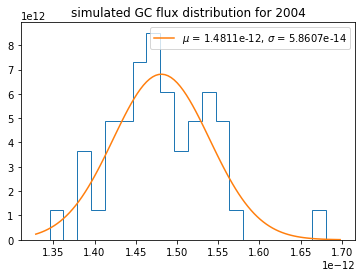

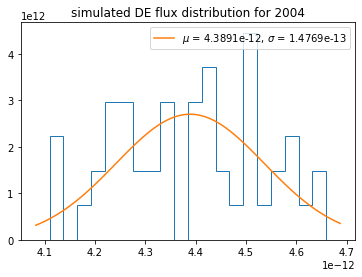

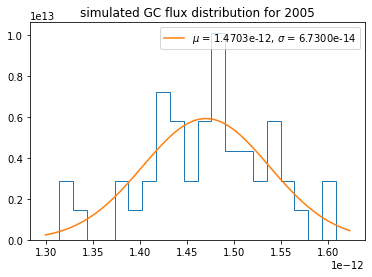

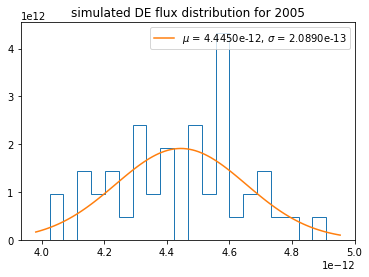

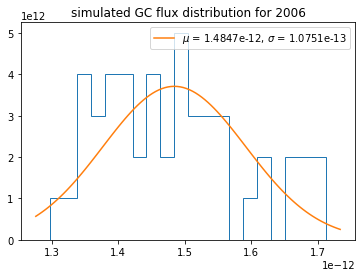

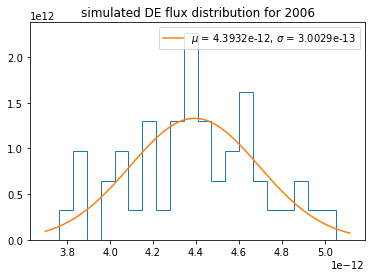

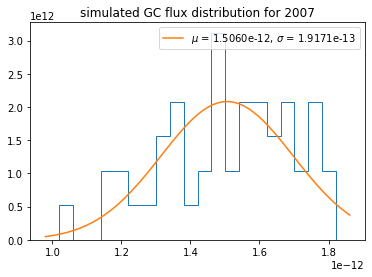

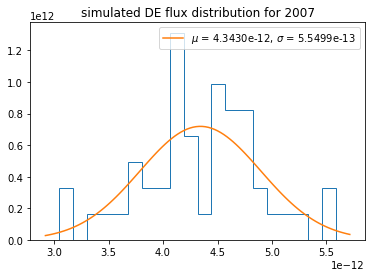

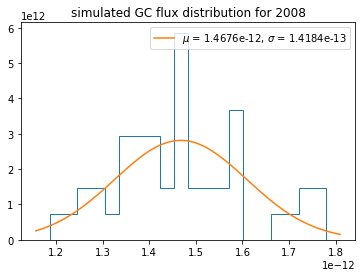

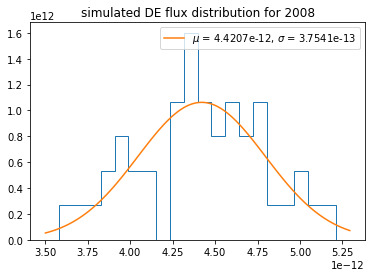

In [37]:
for year in years:
    plt.figure()
    data = np.array(GCflux_distribution[year], dtype=float)
    plt.hist(data ,20, histtype='step', density=True)
    
    mean,std = norm.fit(data)
    GCFlux_means.append(mean)
    GCFlux_error.append(std)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label=r'$\mu$ = {0:03.4e}, $\sigma$ = {1:03.4e}'.format(mean,std))
    plt.legend()
    plt.title(f"simulated GC flux distribution for {year}")
    
    plt.figure()
    data = np.array(DEflux_distribution[year], dtype=float)
    plt.hist(data ,20, histtype='step', density=True)
    
    mean,std = norm.fit(data)
    DEFlux_means.append(mean)
    DEFlux_error.append(std)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label=r'$\mu$ = {0:03.4e}, $\sigma$ = {1:03.4e}'.format(mean,std))
    plt.legend()
    plt.title(f"simulated DE flux distribution for {year}")

ValueError: x and y must have same first dimension, but have shapes (5,) and (25,)

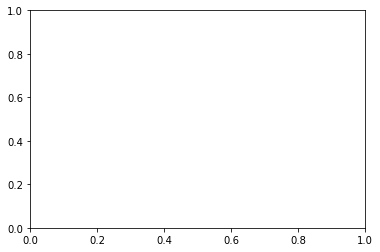

In [40]:
plt.plot(years, GCFlux_means)
plt.plot(years, DEFlux_means)

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

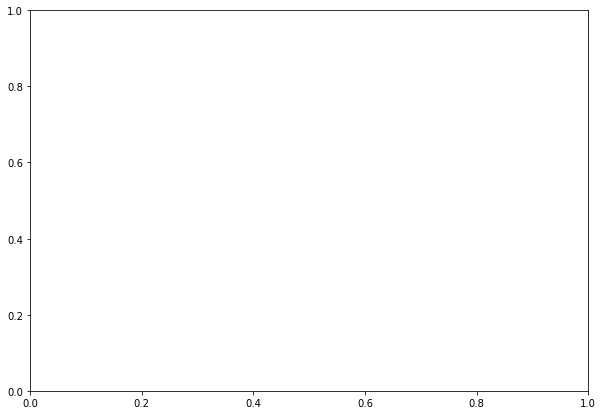

In [28]:
x = years
y = GCFlux_means
y_err = GCFlux_error

def t(x):
    return model_GC_best.spectral_model.integral(emin, emax)

plt.figure(figsize=(10,7))

plt.plot(x, y, 'ko')
plt.errorbar(x, y, yerr=y_err, fmt='kx', label="simulated points")
plt.plot(x, t(x), label=f"theoretical flux")# = {A2:0.2e} ± {error_const:0.1e}, pval = {pv:0.3f}")

plt.xlabel('year')
plt.ylabel('Flux (1/cm²s¹)')
plt.legend()
plt.title("Simulated HESS J1745-290 flux")

plt.savefig(pathres/"LC_GC_simu_1cut_fr.pdf")

In [ ]:
x = years
y = DEFlux_means
y_err = DEFlux_error

def t(x):
    return model_diff_best.spectral_model.integral(emin, emax)

plt.figure(figsize=(10,7))

plt.plot(x, y, 'ko')
plt.errorbar(x, y, yerr=y_err, fmt='kx', label="simulated points")
plt.plot(x, t(x), label=f"theoretical flux")# = {A2:0.2e} ± {error_const:0.1e}, pval = {pv:0.3f}")

plt.xlabel('year')
plt.ylabel('Flux (1/cm²s¹)')
plt.legend()
plt.title("Simulated diffuse emission flux")

plt.savefig(pathres/"LC_DE_simu_1cut_fr.pdf")

In [ ]:
x = years
y = GCFlux_means/DEFlux_means
y_err = (GCFlux_means/DEFlux_means)*np.sqrt((GCFlux_error/GCFlux_means)**2 + (DEFlux_error/DEFlux_means)**2 ) 
#cross term with covariance isn't there since we have no computable covariance

def t(x):
    return model_GC_best.spectral_model.integral(emin, emax)/model_diff_best.spectral_model.integral(emin, emax)

plt.figure(figsize=(10,7))

plt.plot(x, y, 'ko')
plt.errorbar(x, y, yerr=y_err, fmt='kx', label="simulated points")
plt.plot(x, t(x), label=f"theoretical ratio")# = {A2:0.2e} ± {error_const:0.1e}, pval = {pv:0.3f}")

plt.xlabel('year')
plt.ylabel('Flux (1/cm²s¹)')
plt.legend()
plt.title("Ratio of simulated fluxes")

plt.savefig(pathres/"LC_ratio_simu_1cut_fr.pdf")